In [2]:
import numpy as np
import pandas as pd
import sympy as sp
sp.init_printing(use_unicode=True)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='cm'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

### 1

In [7]:
n = sp.var('n', positive=True, integer=True)
p, q = sp.var('p q', positive=True)
A = sp.Matrix([[1-p, q], [p, 1-q]])

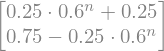

In [22]:
P, D = A.diagonalize()
An = P @ (D**n) @ P.inv()
xyn = An @ sp.Matrix([[sp.Rational(1, 2)], [sp.Rational(1, 2)]])
xyn2 = sp.simplify(xyn)
xyn2.subs({p:0.3, q:0.1})

### 2

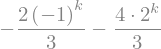

In [24]:
x = sp.Function('x')
k = sp.var('k')
eq = x(k+2) - x(k+1) - 2*x(k)
sp.rsolve(eq, x(k), {x(0):-2, x(1):-2})

### 3

[0.10025417 0.12155819 0.26560297 0.15599967 0.14704536 0.20953964]


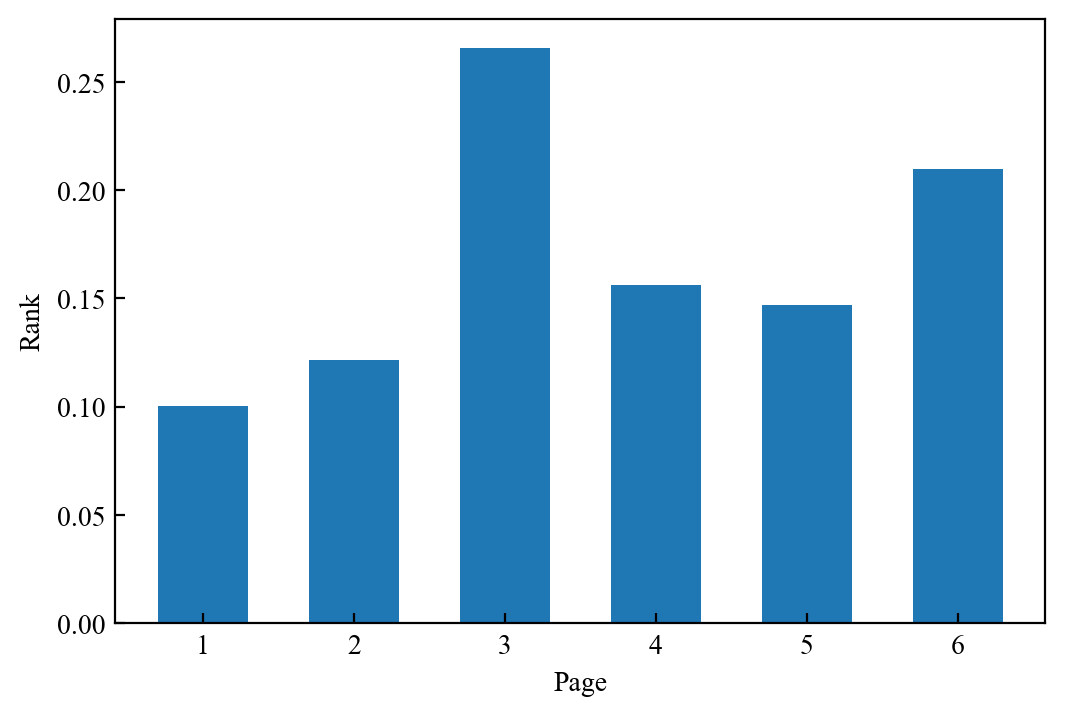

In [42]:
from scipy.sparse.linalg import eigs
L = np.array([[0, 1, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1],
             [1, 1, 0, 1, 0, 0], [0, 0, 0, 0, 1, 1],
             [0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 0]])
r = np.sum(L, axis=1, keepdims=True)
P = L/r
d = 0.85
Ptilde = (1-d)/len(P)*np.ones_like(P) + d*P
val, vec = eigs(Ptilde.T, 1)
V = vec.flatten()
V = V.real
V /= sum(V)
print(V)
fig, ax = plt.subplots()
ax.bar(range(1, len(V)+1), V, width=0.6)
ax.set_xlabel('Page')
ax.set_ylabel('Rank')
fig.show()